In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import collections


# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

### Data Inspection

**1.Flight & Weather**

In [2]:
flight= pd.read_csv("data\df_flights_weather.csv",index_col=0)

In [3]:
flight.shape

(327270, 58)

In [4]:
flight.head().T

,0,1,2,3,4
Unnamed: 0_x,0,3,6,8,12
fl_date,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01
mkt_unique_carrier,DL,DL,DL,DL,DL
branded_code_share,DL_CODESHARE,DL_CODESHARE,DL_CODESHARE,DL_CODESHARE,DL_CODESHARE
mkt_carrier,DL,DL,DL,DL,DL
mkt_carrier_fl_num,5402,5406,5411,5412,5423
op_unique_carrier,EV,EV,EV,EV,EV
tail_num,N753EV,N582CA,N391CA,N538CA,N707EV
op_carrier_fl_num,5402,5406,5411,5412,5423
origin_airport_id,10397,10397,10397,10397,10397


In [5]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327270 entries, 0 to 327269
Data columns (total 58 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0_x                327270 non-null  int64  
 1   fl_date                     327270 non-null  object 
 2   mkt_unique_carrier          327270 non-null  object 
 3   branded_code_share          327270 non-null  object 
 4   mkt_carrier                 327270 non-null  object 
 5   mkt_carrier_fl_num          327270 non-null  int64  
 6   op_unique_carrier           327270 non-null  object 
 7   tail_num                    326301 non-null  object 
 8   op_carrier_fl_num           327270 non-null  int64  
 9   origin_airport_id           327270 non-null  int64  
 10  origin                      327270 non-null  object 
 11  origin_city_name            327270 non-null  object 
 12  dest_airport_id             327270 non-null  int64  
 13  dest          

In [6]:
flight.fl_date.str.split("-",expand=True)

,0,1,2
0,2018,01,01
1,2018,01,01
2,2018,01,01
3,2018,01,01
4,2018,01,01
...,...,...,...
327265,2019,07,31
327266,2019,07,31
327267,2019,07,31
327268,2019,07,31


In [7]:
flight['year']= flight.fl_date.str.split("-",expand=True).iloc[:,0]
flight['month']= flight.fl_date.str.split("-",expand=True).iloc[:,1]
flight['day']= flight.fl_date.str.split("-",expand=True).iloc[:,2]

In [8]:
print(flight.year.value_counts())

2019    165624
2018    161646
Name: year, dtype: int64


In [9]:
flight.groupby(['year','month']).day.count()
# double check the randomization of data by month

year  month
2018  01       13325
      02       11873
      03       13347
      04       13736
      05       12829
      06       12851
      07       15450
      08       15091
      09       11914
      10       14114
      11       13740
      12       13376
2019  01       12979
      02       12311
      03       13651
      04       13513
      05       14167
      06       14169
      07       13798
      08       13747
      09       14993
      10       14802
      11       13933
      12       13561
Name: day, dtype: int64

In [10]:
# remove row with no data in target
flight= flight[flight.arr_delay.isna()== False]

In [11]:
flight.columns

Index(['Unnamed: 0_x', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'crs_dep_time_rounded',
       'formatted_datetime', 'origin_city_name_formatted', 'Unnamed: 0_y',
       'tempC', 'HeatIndexC', 'DewPointC', 'WindChillC', 'windspeedMiles',
       'WindGustMiles', 'weatherCode', 'precipMM', 'humidity', 'visibil

**2.Weather table**

In [12]:
weather_features= ['tempC', 'HeatIndexC', 'DewPointC', 'WindChillC', 'windspeedMiles',
       'WindGustMiles', 'weatherCode', 'precipMM', 'humidity', 'visibility',
       'cloudcover','arr_delay']

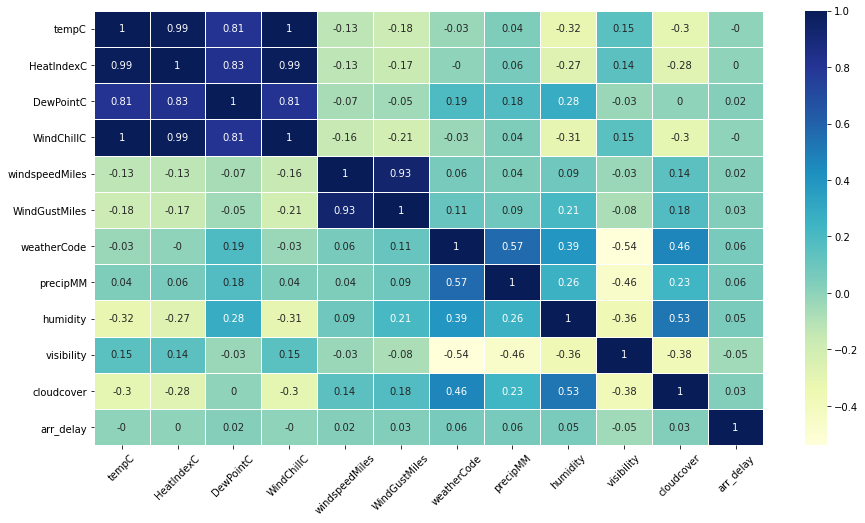

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(flight[weather_features].corr().round(2),
            linewidths=0.5,cbar=True,cmap='YlGnBu',annot=True)
plt.xticks(rotation=45)
plt.show()
# drop 'HeatIndexC' & 'DewPointC' & 'WindChillC' (high correlation with temC), 'windspeedMiles'

In [14]:
weather_features= ['tempC', 'HeatIndexC', 'DewPointC', 'WindChillC', 'windspeedMiles',
       'WindGustMiles', 'weatherCode', 'precipMM', 'humidity', 'visibility',
       'cloudcover']

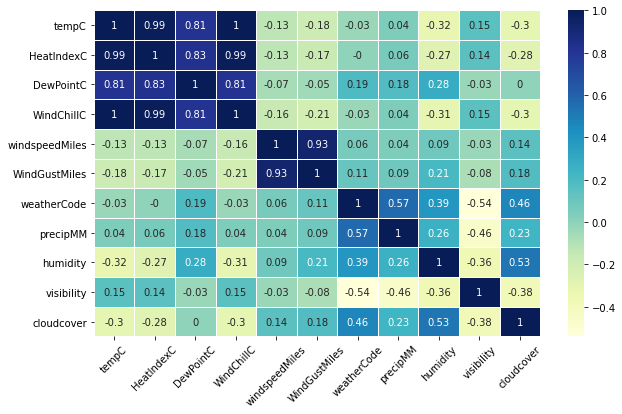

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(flight[weather_features].corr().round(2),
            linewidths=0.5,cbar=True,cmap='YlGnBu',annot=True)
plt.xticks(rotation=45)
plt.show()
# weather features seems to have very low correlation with target, but let keep it for now

**3. Flight test**

In [16]:
flight_test= pd.read_csv('data/flights_test.csv',index_col=0)

In [17]:
features= flight_test.columns.to_list()

In [18]:
features
# feature to be used in flight dataset

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'crs_arr_time',
 'dup',
 'crs_elapsed_time',
 'flights',
 'distance']

**4.Flight Table**

In [19]:
df_flight= flight[['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
                 'arr_delay','carrier_delay','weather_delay','dep_delay',
                  ]]
df_flight.head()
# use features set from flight test & 'arr_delay'
#'carrier_delay','weather_delay','dep_delay' is used to convert categorical feature into ordinal features based on weight

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,carrier_delay,weather_delay,dep_delay
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,1250,1244,N,54.0,1.0,134.0,59.0,44.0,0.0,67.0
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,1335,1451,N,136.0,1.0,674.0,11.0,NaN,NaN,20.0
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,1620,1724,N,64.0,1.0,223.0,-1.0,NaN,NaN,4.0
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,1212,1314,N,122.0,1.0,563.0,95.0,33.0,0.0,101.0
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,1345,1505,N,80.0,1.0,300.0,19.0,0.0,0.0,39.0


**4.1.Process categorical feature**

tail_num

In [20]:
df_flight.tail_num= df_flight.tail_num.str.extract('(\d+)')[0]

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
df_flight.tail_num.unique()

array(['753', '582', '391', ..., '91007', '59053', '2333'], dtype=object)

mkt_unique_carrier_code

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
mkt =LabelEncoder()
df_flight['mkt_unique_carrier_code']= mkt.fit_transform(df_flight.mkt_unique_carrier)

<ipython-input-23-0a43ed072781>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flight['mkt_unique_carrier_code']= mkt.fit_transform(df_flight.mkt_unique_carrier)


op_unique_carrier_code

In [24]:
op =LabelEncoder()
df_flight['op_unique_carrier_code']= op.fit_transform(df_flight.op_unique_carrier)

<ipython-input-24-4d5ce184053f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flight['op_unique_carrier_code']= op.fit_transform(df_flight.op_unique_carrier)


dayofweek & day

In [25]:
df_flight.fl_date = pd.to_datetime(df_flight.fl_date)
df_flight['day_of_week']=df_flight.fl_date.dt.weekday
df_flight['day']=df_flight.fl_date.dt.day

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-25-ba32683d7a4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flight['day_of_week']=df_flight.fl_date.dt.weekday
<ipython-input-25-ba32683d7a4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

feature having high correlation with target

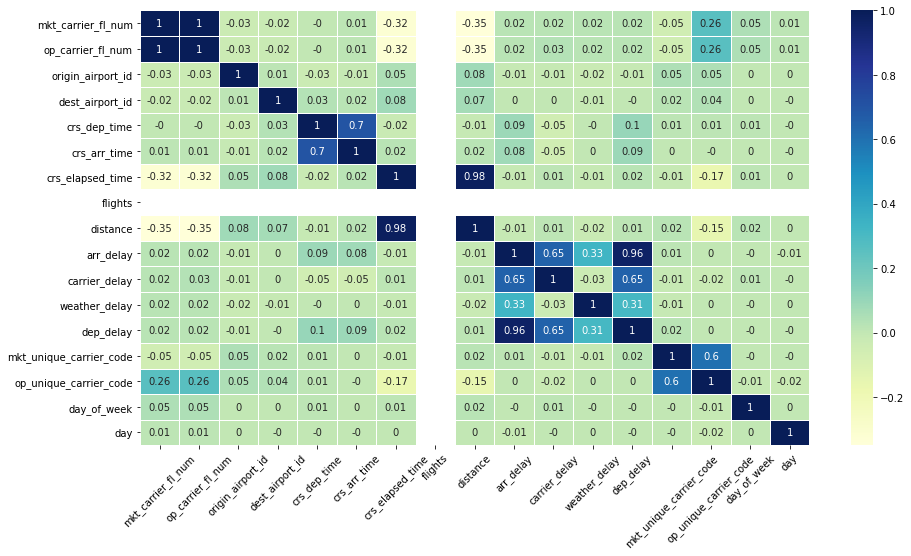

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(df_flight.corr().round(2),
            linewidths=0.5,cbar=True,cmap='YlGnBu',annot=True)
plt.xticks(rotation=45)
plt.show()
# arr_delay (target) have high correlation with (dep_delay, weather_delay, carrier_delay) >> encode categorical base on these feature
# crs_elapsed_time have high correlation with distance >> just pick one

**4.2. mkt_unique_carrier, mkt_carrier**

In [27]:
df_flight.groupby(['mkt_unique_carrier','mkt_carrier']).arr_delay.count().sort_values(ascending=False)
# duplicate columns, use mkt_unique_carrier

mkt_unique_carrier  mkt_carrier
AA                  AA             81777
DL                  DL             72414
UA                  UA             61180
WN                  WN             54957
AS                  AS             16925
B6                  B6             11755
NK                  NK              7906
F9                  F9              5555
G4                  G4              4041
HA                  HA              3833
VX                  VX               256
Name: arr_delay, dtype: int64

**4.3. origin airport >> encode by weather_delay, dep_delay**

***a) origin airport with high incidence of weather_delay***

In [28]:
bad_weather_airport = df_flight.groupby(['origin_airport_id']).weather_delay.mean().round(0).sort_values(ascending=False)
bad_weather_airport

origin_airport_id
12335    182.0
11867     90.0
16869     79.0
11447     70.0
11415     67.0
         ...  
11468      NaN
11997      NaN
13873      NaN
14582      NaN
15897      NaN
Name: weather_delay, Length: 374, dtype: float64

In [29]:
bad_weather_airport= bad_weather_airport.reset_index()
bad_weather_airport

,origin_airport_id,weather_delay
0,12335,182.0
1,11867,90.0
2,16869,79.0
3,11447,70.0
4,11415,67.0
...,...,...
369,11468,NaN
370,11997,NaN
371,13873,NaN
372,14582,NaN


In [30]:
bad_weather_airport.fillna(0,inplace= True)

In [31]:
pd.cut(bad_weather_airport.weather_delay, 10, precision= 0).unique()

[(164.0, 182.0], (73.0, 91.0], (55.0, 73.0], (36.0, 55.0], (18.0, 36.0], (-0.0, 18.0]]
Categories (10, interval[float64, right]): [(-0.0, 18.0] < (18.0, 36.0] < (36.0, 55.0] < (55.0, 73.0] ... (109.0, 127.0] < (127.0, 146.0] < (146.0, 164.0] < (164.0, 182.0]]

In [32]:
bins = [-np.inf,1,18,36,55,73,109,127,145,164,np.inf]
group_names = [1,2,3,4,5,6,7,8,9,10]
bad_weather_airport['bin']= pd.cut(bad_weather_airport.weather_delay, bins, right = False, labels = group_names)

In [33]:
# check
bad_weather_airport.head()

,origin_airport_id,weather_delay,bin
0,12335,182.0,10
1,11867,90.0,6
2,16869,79.0,6
3,11447,70.0,5
4,11415,67.0,5


In [34]:
bad_weather_airport.columns= ['origin_airport_id','origin_weather_delay','origin_weather_delay_bin']

In [35]:
bad_weather_airport.head()

,origin_airport_id,origin_weather_delay,origin_weather_delay_bin
0,12335,182.0,10
1,11867,90.0,6
2,16869,79.0,6
3,11447,70.0,5
4,11415,67.0,5


***b) origin airport with high incidence of departure delay***

In [36]:
departure_delay_airport= df_flight.groupby(['origin_airport_id']).dep_delay.mean().round(0).sort_values(ascending=False)
departure_delay_airport= departure_delay_airport.reset_index()

In [37]:
departure_delay_airport.head()

,origin_airport_id,dep_delay
0,13964,119.0
1,12250,90.0
2,13832,71.0
3,12255,70.0
4,16869,64.0


In [38]:
pd.cut(departure_delay_airport.dep_delay, 10, precision= 0).unique()

[(105.0, 119.0], (76.0, 91.0], (62.0, 76.0], (48.0, 62.0], (34.0, 48.0], (20.0, 34.0], (5.0, 20.0], (-9.0, 5.0], (-23.0, -9.0]]
Categories (10, interval[float64, right]): [(-23.0, -9.0] < (-9.0, 5.0] < (5.0, 20.0] < (20.0, 34.0] ... (62.0, 76.0] < (76.0, 91.0] < (91.0, 105.0] < (105.0, 119.0]]

In [39]:
bins = [-np.inf,-23,-9,5,20,34,62,76,91,105,np.inf]
group_names = [1,2,3,4,5,6,7,8,9,10]
departure_delay_airport['bin']= pd.cut(departure_delay_airport.dep_delay, bins, right = False, labels = group_names)

In [40]:
departure_delay_airport.head()

,origin_airport_id,dep_delay,bin
0,13964,119.0,10
1,12250,90.0,8
2,13832,71.0,7
3,12255,70.0,7
4,16869,64.0,7


In [41]:
departure_delay_airport.columns=['origin_airport_id','origin_dep_delay','origin_dep_delay_bin']

In [42]:
departure_delay_airport.head()

,origin_airport_id,origin_dep_delay,origin_dep_delay_bin
0,13964,119.0,10
1,12250,90.0,8
2,13832,71.0,7
3,12255,70.0,7
4,16869,64.0,7


**4.4.mkt carrier >> encode by carrier_delay, dep_delay**

***a) mkt carrier with high incidence of carrier_delay***

In [43]:
delayed_mkt_carrier= df_flight.groupby(['mkt_unique_carrier']).carrier_delay.mean().round(0).sort_values(ascending=False)
delayed_mkt_carrier.head()

mkt_unique_carrier
HA    32.0
DL    25.0
B6    24.0
G4    24.0
UA    21.0
Name: carrier_delay, dtype: float64

In [44]:
delayed_mkt_carrier= delayed_mkt_carrier.reset_index()

In [45]:
delayed_mkt_carrier

,mkt_unique_carrier,carrier_delay
0,HA,32.0
1,DL,25.0
2,B6,24.0
3,G4,24.0
4,UA,21.0
5,AA,20.0
6,F9,20.0
7,WN,17.0
8,AS,14.0
9,NK,12.0


In [46]:
delayed_mkt_carrier.columns= ['mkt_unique_carrier','mkt_carrier_delay']

In [47]:
delayed_mkt_carrier.head()

,mkt_unique_carrier,mkt_carrier_delay
0,HA,32.0
1,DL,25.0
2,B6,24.0
3,G4,24.0
4,UA,21.0


***b) mkt_unique_carrier with high incidence of departure delay***

In [48]:
departure_delay_mkt_carrier= df_flight.groupby(['mkt_unique_carrier']).dep_delay.mean().round(0).sort_values(ascending=False)
departure_delay_mkt_carrier= departure_delay_mkt_carrier.reset_index()

In [49]:
departure_delay_mkt_carrier

,mkt_unique_carrier,dep_delay
0,B6,16.0
1,F9,16.0
2,UA,13.0
3,NK,11.0
4,WN,11.0
5,AA,10.0
6,DL,9.0
7,G4,9.0
8,VX,7.0
9,AS,4.0


In [50]:
departure_delay_mkt_carrier.columns=['mkt_unique_carrier','mkt_carrier_dep_delay']

In [51]:
departure_delay_mkt_carrier.head()

,mkt_unique_carrier,mkt_carrier_dep_delay
0,B6,16.0
1,F9,16.0
2,UA,13.0
3,NK,11.0
4,WN,11.0


**4.5.op carrier >> endocde by carrier_delay, dep_delay**

***a) op carrier with high incidence of carrier_delay***

In [52]:
delayed_op_carrier=df_flight.groupby(['op_unique_carrier']).carrier_delay.mean().round(0).sort_values(ascending=False)
delayed_op_carrier= delayed_op_carrier.reset_index()

In [53]:
delayed_op_carrier.head()

,op_unique_carrier,carrier_delay
0,9K,136.0
1,HA,36.0
2,G7,30.0
3,OO,29.0
4,CP,26.0


In [54]:
delayed_op_carrier.columns= ['op_unique_carrier','op_carrier_delay']

In [55]:
delayed_op_carrier.head()

,op_unique_carrier,op_carrier_delay
0,9K,136.0
1,HA,36.0
2,G7,30.0
3,OO,29.0
4,CP,26.0


***b) op_unique_carrier with high incidence of departure delay***

In [56]:
departure_delay_op_carrier=df_flight.groupby(['op_unique_carrier']).dep_delay.mean().round(0).sort_values(ascending=False)
departure_delay_op_carrier= departure_delay_op_carrier.reset_index()

In [57]:
departure_delay_op_carrier.head()

,op_unique_carrier,dep_delay
0,9K,67.0
1,C5,25.0
2,KS,24.0
3,AX,18.0
4,B6,16.0


In [58]:
departure_delay_op_carrier.columns= ['op_unique_carrier','op_carrier_dep_delay']

In [59]:
departure_delay_op_carrier.head()

,op_unique_carrier,op_carrier_dep_delay
0,9K,67.0
1,C5,25.0
2,KS,24.0
3,AX,18.0
4,B6,16.0


**4.6.crs_dep_time, dep_delay >> time slot with high incidence of dep_delay** 

In [60]:
df_flight['crs_dep_hour']= np.floor(df_flight.crs_dep_time/100)

<ipython-input-60-2968f73a2157>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flight['crs_dep_hour']= np.floor(df_flight.crs_dep_time/100)


In [61]:
df_flight.groupby('crs_dep_hour').agg({'dep_delay': 'mean'}).round().reset_index()
# higher delay among flights depart around 14-22hrs

,crs_dep_hour,dep_delay
0,0.0,10.0
1,1.0,8.0
2,2.0,9.0
3,3.0,13.0
4,4.0,8.0
5,5.0,3.0
6,6.0,3.0
7,7.0,4.0
8,8.0,5.0
9,9.0,5.0


### Feature Engineering

**Choosing x & y**

In [62]:
x_flight= flight[features+weather_features]
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,HeatIndexC,DewPointC,WindChillC,windspeedMiles,WindGustMiles,weatherCode,precipMM,humidity,visibility,cloudcover
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,0.0,-14.0,-4.0,6.0,7.0,323.0,0.0,36.0,10.0,20.0
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,0.0,-14.0,-4.0,6.0,7.0,323.0,0.0,36.0,10.0,20.0
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,0.0,-14.0,-4.0,6.0,7.0,323.0,0.0,36.0,10.0,20.0
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,0.0,-14.0,-4.0,6.0,7.0,323.0,0.0,36.0,10.0,20.0
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,0.0,-14.0,-4.0,6.0,7.0,323.0,0.0,36.0,10.0,20.0


In [63]:
y_flight= flight['arr_delay']
y_flight.head()

0    59.0
1    11.0
2    -1.0
3    95.0
4    19.0
Name: arr_delay, dtype: float64

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

In [64]:
x_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320599 entries, 0 to 327269
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             320599 non-null  object 
 1   mkt_unique_carrier  320599 non-null  object 
 2   branded_code_share  320599 non-null  object 
 3   mkt_carrier         320599 non-null  object 
 4   mkt_carrier_fl_num  320599 non-null  int64  
 5   op_unique_carrier   320599 non-null  object 
 6   tail_num            320599 non-null  object 
 7   op_carrier_fl_num   320599 non-null  int64  
 8   origin_airport_id   320599 non-null  int64  
 9   origin              320599 non-null  object 
 10  origin_city_name    320599 non-null  object 
 11  dest_airport_id     320599 non-null  int64  
 12  dest                320599 non-null  object 
 13  dest_city_name      320599 non-null  object 
 14  crs_dep_time        320599 non-null  int64  
 15  crs_arr_time        320599 non-nul

**1.fl_date >> feature: day of week, day**

In [65]:
x_flight.fl_date = pd.to_datetime(x_flight.fl_date)
x_flight['day_of_week']=x_flight.fl_date.dt.weekday

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-65-3091dbe461ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_flight['day_of_week']=x_flight.fl_date.dt.weekday


In [66]:
x_flight['day']= x_flight.fl_date.dt.day

<ipython-input-66-4fee40f7e301>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_flight['day']= x_flight.fl_date.dt.day


In [67]:
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,WindChillC,windspeedMiles,WindGustMiles,weatherCode,precipMM,humidity,visibility,cloudcover,day_of_week,day
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,-4.0,6.0,7.0,323.0,0.0,36.0,10.0,20.0,0,1
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,-4.0,6.0,7.0,323.0,0.0,36.0,10.0,20.0,0,1
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,-4.0,6.0,7.0,323.0,0.0,36.0,10.0,20.0,0,1
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,-4.0,6.0,7.0,323.0,0.0,36.0,10.0,20.0,0,1
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,-4.0,6.0,7.0,323.0,0.0,36.0,10.0,20.0,0,1


**2.mkt_unique_carrier, mkt_carrier (both features are similar) >> feature: mkt_carrier_encoder, mkt_carrier_delay, mkt_carrier_dep_delay (Ordinal encoder)**

In [68]:
# mkt_carrier_encoder
mkt =LabelEncoder()
x_flight['mkt_unique_carrier_code']= mkt.fit_transform(x_flight.mkt_unique_carrier)
x_flight.head()

<ipython-input-68-c0157536333b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_flight['mkt_unique_carrier_code']= mkt.fit_transform(x_flight.mkt_unique_carrier)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,windspeedMiles,WindGustMiles,weatherCode,precipMM,humidity,visibility,cloudcover,day_of_week,day,mkt_unique_carrier_code
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,6.0,7.0,323.0,0.0,36.0,10.0,20.0,0,1,3
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,6.0,7.0,323.0,0.0,36.0,10.0,20.0,0,1,3
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,6.0,7.0,323.0,0.0,36.0,10.0,20.0,0,1,3
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,6.0,7.0,323.0,0.0,36.0,10.0,20.0,0,1,3
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,6.0,7.0,323.0,0.0,36.0,10.0,20.0,0,1,3


In [69]:
#carrier_delay, carrier with high incidence of carrier delay
x_flight = x_flight.merge(delayed_mkt_carrier,how='left')

In [70]:
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,WindGustMiles,weatherCode,precipMM,humidity,visibility,cloudcover,day_of_week,day,mkt_unique_carrier_code,mkt_carrier_delay
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,7.0,323.0,0.0,36.0,10.0,20.0,0,1,3,25.0
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,7.0,323.0,0.0,36.0,10.0,20.0,0,1,3,25.0
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,7.0,323.0,0.0,36.0,10.0,20.0,0,1,3,25.0
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,7.0,323.0,0.0,36.0,10.0,20.0,0,1,3,25.0
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,7.0,323.0,0.0,36.0,10.0,20.0,0,1,3,25.0


In [71]:
#dep_delay, carrier with high incidence of dep_delay
x_flight= x_flight.merge(departure_delay_mkt_carrier,how='left')

In [72]:
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weatherCode,precipMM,humidity,visibility,cloudcover,day_of_week,day,mkt_unique_carrier_code,mkt_carrier_delay,mkt_carrier_dep_delay
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,323.0,0.0,36.0,10.0,20.0,0,1,3,25.0,9.0
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,323.0,0.0,36.0,10.0,20.0,0,1,3,25.0,9.0
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,323.0,0.0,36.0,10.0,20.0,0,1,3,25.0,9.0
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,323.0,0.0,36.0,10.0,20.0,0,1,3,25.0,9.0
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,323.0,0.0,36.0,10.0,20.0,0,1,3,25.0,9.0


In [73]:
x_flight[['mkt_carrier_delay','mkt_carrier_dep_delay']].isna().sum()

mkt_carrier_delay        0
mkt_carrier_dep_delay    0
dtype: int64

**4.op_unique_carrier >> feature: op_carrier_code,op_carrier_delay, op_carrier_dep_delay (Ordinal encoder)**

In [74]:
#op_carrier_code
op =LabelEncoder()
x_flight['op_unique_carrier_code']= op.fit_transform(x_flight.op_unique_carrier)
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,precipMM,humidity,visibility,cloudcover,day_of_week,day,mkt_unique_carrier_code,mkt_carrier_delay,mkt_carrier_dep_delay,op_unique_carrier_code
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,0.0,36.0,10.0,20.0,0,1,3,25.0,9.0,10
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,0.0,36.0,10.0,20.0,0,1,3,25.0,9.0,10
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,0.0,36.0,10.0,20.0,0,1,3,25.0,9.0,10
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,0.0,36.0,10.0,20.0,0,1,3,25.0,9.0,10
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,0.0,36.0,10.0,20.0,0,1,3,25.0,9.0,10


In [75]:
#op_carrier_delay, op_carrier with high incidence of carrier delay
x_flight = x_flight.merge(delayed_op_carrier,how='left')

In [76]:
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,humidity,visibility,cloudcover,day_of_week,day,mkt_unique_carrier_code,mkt_carrier_delay,mkt_carrier_dep_delay,op_unique_carrier_code,op_carrier_delay
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,36.0,10.0,20.0,0,1,3,25.0,9.0,10,25.0
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,36.0,10.0,20.0,0,1,3,25.0,9.0,10,25.0
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,36.0,10.0,20.0,0,1,3,25.0,9.0,10,25.0
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,36.0,10.0,20.0,0,1,3,25.0,9.0,10,25.0
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,36.0,10.0,20.0,0,1,3,25.0,9.0,10,25.0


In [77]:
#op_carrier_delay, op_carrier with high incidence of departure delay
x_flight = x_flight.merge(departure_delay_op_carrier,how='left')

In [78]:
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,visibility,cloudcover,day_of_week,day,mkt_unique_carrier_code,mkt_carrier_delay,mkt_carrier_dep_delay,op_unique_carrier_code,op_carrier_delay,op_carrier_dep_delay
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,10.0,20.0,0,1,3,25.0,9.0,10,25.0,15.0
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,10.0,20.0,0,1,3,25.0,9.0,10,25.0,15.0
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,10.0,20.0,0,1,3,25.0,9.0,10,25.0,15.0
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,10.0,20.0,0,1,3,25.0,9.0,10,25.0,15.0
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,10.0,20.0,0,1,3,25.0,9.0,10,25.0,15.0


In [79]:
x_flight[['op_carrier_delay','op_carrier_dep_delay']].isna().sum()

op_carrier_delay        0
op_carrier_dep_delay    0
dtype: int64

**6. origin, origin_airport_id, origin_city_name >> Feature: origin_weather_delay, origin_dep_delay**

In [80]:
print(len(x_flight.origin.unique()))
print(len(x_flight.origin_airport_id.unique()))
print(len(x_flight.origin_city_name.unique()))

374
374
366


In [81]:
# Ordinal encoder by weather_delay (origin airport with high incidence of weather delay)
x_flight= x_flight.merge(bad_weather_airport,how='left')
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,day_of_week,day,mkt_unique_carrier_code,mkt_carrier_delay,mkt_carrier_dep_delay,op_unique_carrier_code,op_carrier_delay,op_carrier_dep_delay,origin_weather_delay,origin_weather_delay_bin
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,0,1,3,25.0,9.0,10,25.0,15.0,6.0,2
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,0,1,3,25.0,9.0,10,25.0,15.0,6.0,2
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,0,1,3,25.0,9.0,10,25.0,15.0,6.0,2
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,0,1,3,25.0,9.0,10,25.0,15.0,6.0,2
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,0,1,3,25.0,9.0,10,25.0,15.0,6.0,2


In [82]:
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,day_of_week,day,mkt_unique_carrier_code,mkt_carrier_delay,mkt_carrier_dep_delay,op_unique_carrier_code,op_carrier_delay,op_carrier_dep_delay,origin_weather_delay,origin_weather_delay_bin
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,0,1,3,25.0,9.0,10,25.0,15.0,6.0,2
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,0,1,3,25.0,9.0,10,25.0,15.0,6.0,2
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,0,1,3,25.0,9.0,10,25.0,15.0,6.0,2
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,0,1,3,25.0,9.0,10,25.0,15.0,6.0,2
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,0,1,3,25.0,9.0,10,25.0,15.0,6.0,2


In [83]:
# Ordinal encoder by departure_delay (origin airport with high incidence of departure delay)
x_flight= x_flight.merge(departure_delay_airport,how='left')
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,mkt_unique_carrier_code,mkt_carrier_delay,mkt_carrier_dep_delay,op_unique_carrier_code,op_carrier_delay,op_carrier_dep_delay,origin_weather_delay,origin_weather_delay_bin,origin_dep_delay,origin_dep_delay_bin
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,3,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,3,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,3,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,3,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,3,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4


In [84]:
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,mkt_unique_carrier_code,mkt_carrier_delay,mkt_carrier_dep_delay,op_unique_carrier_code,op_carrier_delay,op_carrier_dep_delay,origin_weather_delay,origin_weather_delay_bin,origin_dep_delay,origin_dep_delay_bin
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,3,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,3,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,3,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,3,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,3,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4


**7.traffic by airport by hour**

In [85]:
# round up dep_time to hour
x_flight['crs_dep_hour']= np.floor(x_flight.crs_dep_time/100)
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,mkt_carrier_delay,mkt_carrier_dep_delay,op_unique_carrier_code,op_carrier_delay,op_carrier_dep_delay,origin_weather_delay,origin_weather_delay_bin,origin_dep_delay,origin_dep_delay_bin,crs_dep_hour
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4,12.0
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4,13.0
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4,16.0
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4,12.0
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,25.0,9.0,10,25.0,15.0,6.0,2,9.0,4,13.0


In [86]:
# at the departure time, how many flights are schedule to departure within the same timeslot (hrs) at the origin airport
x_flight.groupby(['origin_airport_id','fl_date','crs_dep_hour']).flights.count().sort_values(ascending=False)

origin_airport_id  fl_date     crs_dep_hour
11298              2018-05-30  20.0            12
10397              2018-11-25  9.0             12
15304              2019-02-14  10.0            12
                   2018-09-20  9.0             12
10397              2019-06-06  19.0            12
                                               ..
12173              2018-08-25  12.0             1
                   2018-08-29  21.0             1
                   2018-08-31  21.0             1
                   2018-09-01  12.0             1
16869              2019-12-25  15.0             1
Name: flights, Length: 229445, dtype: int64

In [87]:
x_flight['departure_traffic']=x_flight.groupby(['origin_airport_id','fl_date','crs_dep_hour']).flights.transform('count')

In [88]:
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,mkt_carrier_dep_delay,op_unique_carrier_code,op_carrier_delay,op_carrier_dep_delay,origin_weather_delay,origin_weather_delay_bin,origin_dep_delay,origin_dep_delay_bin,crs_dep_hour,departure_traffic
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,9.0,10,25.0,15.0,6.0,2,9.0,4,12.0,4
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,9.0,10,25.0,15.0,6.0,2,9.0,4,13.0,4
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,9.0,10,25.0,15.0,6.0,2,9.0,4,16.0,1
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,9.0,10,25.0,15.0,6.0,2,9.0,4,12.0,4
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,9.0,10,25.0,15.0,6.0,2,9.0,4,13.0,4


**8.crs_dep_time, crs_arr_time**

In [89]:
x_flight['crs_arr_hour']= np.floor(x_flight.crs_arr_time/100)
x_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,op_unique_carrier_code,op_carrier_delay,op_carrier_dep_delay,origin_weather_delay,origin_weather_delay_bin,origin_dep_delay,origin_dep_delay_bin,crs_dep_hour,departure_traffic,crs_arr_hour
0,2018-01-01,DL,DL_CODESHARE,DL,5402,EV,N753EV,5402,10397,ATL,...,10,25.0,15.0,6.0,2,9.0,4,12.0,4,12.0
1,2018-01-01,DL,DL_CODESHARE,DL,5406,EV,N582CA,5406,10397,ATL,...,10,25.0,15.0,6.0,2,9.0,4,13.0,4,14.0
2,2018-01-01,DL,DL_CODESHARE,DL,5411,EV,N391CA,5411,10397,ATL,...,10,25.0,15.0,6.0,2,9.0,4,16.0,1,17.0
3,2018-01-01,DL,DL_CODESHARE,DL,5412,EV,N538CA,5412,10397,ATL,...,10,25.0,15.0,6.0,2,9.0,4,12.0,4,13.0
4,2018-01-01,DL,DL_CODESHARE,DL,5423,EV,N707EV,5423,10397,ATL,...,10,25.0,15.0,6.0,2,9.0,4,13.0,4,15.0


In [90]:
x_flight['crs_dep_evening']= np.where((x_flight['crs_dep_hour']>=14) & (x_flight['crs_dep_hour']<=22),1,0)

**9.CHOOSE FEATURE**

In [91]:
x_flight.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'tempC', 'HeatIndexC', 'DewPointC', 'WindChillC', 'windspeedMiles',
       'WindGustMiles', 'weatherCode', 'precipMM', 'humidity', 'visibility',
       'cloudcover', 'day_of_week', 'day', 'mkt_unique_carrier_code',
       'mkt_carrier_delay', 'mkt_carrier_dep_delay', 'op_unique_carrier_code',
       'op_carrier_delay', 'op_carrier_dep_delay', 'origin_weather_delay',
       'origin_weather_delay_bin', 'origin_dep_delay', 'origin_dep_delay_bin',
       'crs_dep_hour', 'departure_traffic', 'crs_arr_hour', 'crs_dep_evening'],
      dtype='object')

In [92]:
#weather feature to be dropped 
#'HeatIndexC' & 'DewPointC' & 'WindChillC' (high correlation with temC), 'windspeedMiles'

In [93]:
x_flight.shape

(320599, 47)

In [94]:
y_flight.shape

(320599,)

In [98]:
#flight_export= x_flight
#flight_export['target']= y_flight
#flight_export.to_csv('flight_export.csv')

In [99]:
#flight_export.shape

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

Random Forest

In [103]:
features1= ['crs_elapsed_time', 
       'tempC', 'WindGustMiles', 'weatherCode', 'precipMM', 'humidity',
       'visibility', 'cloudcover', 'day_of_week', 'day', 'mkt_carrier_delay',
       'mkt_carrier_dep_delay', 'op_carrier_delay', 'op_carrier_dep_delay',
       'origin_weather_delay', 'origin_dep_delay','crs_dep_hour', 'departure_traffic',
       'crs_arr_hour', 'crs_dep_evening']

In [104]:
from sklearn.ensemble  import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test= train_test_split(x_flight[features1]
                                                ,y_flight, test_size= 0.3,random_state= 123)

In [106]:
model1= RandomForestRegressor(n_estimators= 500,oob_score= True,n_jobs= -1, random_state= 42,min_samples_leaf=5,
                     max_features=15)

In [107]:
model1.fit(x_train,y_train)

RandomForestRegressor(max_features=15, min_samples_leaf=5, n_estimators=500,
                      n_jobs=-1, oob_score=True, random_state=42)

In [108]:
model1.score(x_train,y_train)

0.41419263211890245

In [109]:
model1.score(x_test,y_test)

0.060726813094667875

In [110]:
feature_importance= pd.Series(model1.feature_importances_, index= features1).sort_values(ascending=False)
feature_importance

crs_elapsed_time         0.122407
humidity                 0.100875
tempC                    0.095014
day                      0.089393
cloudcover               0.087692
WindGustMiles            0.081929
origin_dep_delay         0.050674
day_of_week              0.050574
crs_dep_hour             0.048828
crs_arr_hour             0.043804
origin_weather_delay     0.041188
precipMM                 0.037486
op_carrier_delay         0.029802
departure_traffic        0.025177
op_carrier_dep_delay     0.023304
weatherCode              0.022230
mkt_carrier_delay        0.017268
mkt_carrier_dep_delay    0.015040
visibility               0.009372
crs_dep_evening          0.007944
dtype: float64

Linear Regression

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV,LinearRegression 

In [ ]:
feature2= ['crs_elapsed_time', 
       'tempC', 'WindGustMiles', 'weatherCode', 'precipMM', 'humidity',
       'visibility', 'cloudcover', 'day_of_week', 'day',
       'mkt_unique_carrier_code', 'mkt_carrier_delay', 'mkt_carrier_dep_delay',
       'op_unique_carrier_code', 'op_carrier_delay', 'op_carrier_dep_delay',
       'origin_weather_delay',  'origin_dep_delay'
       , 'crs_dep_hour', 'departure_traffic',
       'crs_arr_hour', 'crs_dep_evening']

In [ ]:
bestfeature= SelectKBest(score_func=f_regression, k='all')
fit= bestfeature.fit(x_flight[feature2],y_flight)

In [ ]:
kbest= pd.DataFrame(fit.scores_,feature2,columns=['Score']).sort_values('Score',ascending=False)
kbest

In [ ]:
feature3= kbest[kbest.Score >500].index.to_list()
feature3

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x_flight[feature3],y_flight, test_size= 0.3,random_state= 123)

In [ ]:
lm=LinearRegression(normalize=True)

In [ ]:
lm.fit(x_train,y_train)

In [ ]:
lm.score(x_train,y_train)

In [ ]:
lm.score(x_test,y_test)

Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr=PolynomialFeatures(degree=2)

In [ ]:
pr.fit(x_flight[feature3])

In [ ]:
x_flight_new= pr.transform(x_flight[feature3])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x_flight_new,y_flight,train_size=0.8, random_state=123)

In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)

In [ ]:
lm.score(x_train, y_train)

In [ ]:
lm.score(x_test, y_test)

AdaBoost 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
adb= AdaBoostRegressor(n_estimators=100,learning_rate=0.5,random_state= 123)

In [ ]:
score_3= cross_val_score(adb, x_flight, y_flight, scoring='r2', cv=20)

In [ ]:
score_3

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.